## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

답)

Dataset을 grouping한다는 것은 첫 번째로 dataset을 유사한 것들 끼리 묶는다는 의미가 있다. 예를 들어, 이미지 데이터에서 색이나, 모양이 비슷한 것들을 하나의 group으로 묶는 예시가 있다. 두 번째로는 dataset 사이의 관계를 도출한다는 의미가 있다. 그 예시로 sns 유저들의 패턴을 분석하여 비슷한 관심사를 가진 사용자들을 하나의 group으로 묶을 수 있다.

군집화에 대한 예시 모델로는 k-means가 있다. 이 모델은 주어진 데이터에 대해서 클러스터의 수로 나누는 알고리즘으로 클러스터의 개수만큼의 중심이 있어 이를 기준으로 데이터셋의 군집화가 된다.
또한, 차원축소의 예시모델로는 t-SNE가 있다. 이 모델은 고차원 데이터를 저차원 데이터로 변환하는 방법으로, 고차원 상에서 비슷한 패턴을 가진 데이터들은 그 similarity를 계산하여 저차원으로 축소할 때 더 가까운곳에 위치하게 되어 시각화나, 관계를 이해하기 쉬워진다.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[cols]   
y = df['Outcome']
y, X

(0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64,
      Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
 0              6        0  33.6   50      148             72   
 1              1        0  26.6   31       85             66   
 2              8        0  23.3   32      183             64   
 3              1       94  28.1   21       89             66   
 4              0      168  43.1   33      137             40   
 ..           ...      ...   ...  ...      ...            ...   
 763           10      180  32.9   63      101             76   
 764            2        0  36.8   27      122             70   
 765            5      112  26.2   30      121             72   
 766            1        0  30.1   47      126             60   
 767            1        0  30.4   23       93             70   
 
      DiabetesPedigreeFunction  
 0                       0.627  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


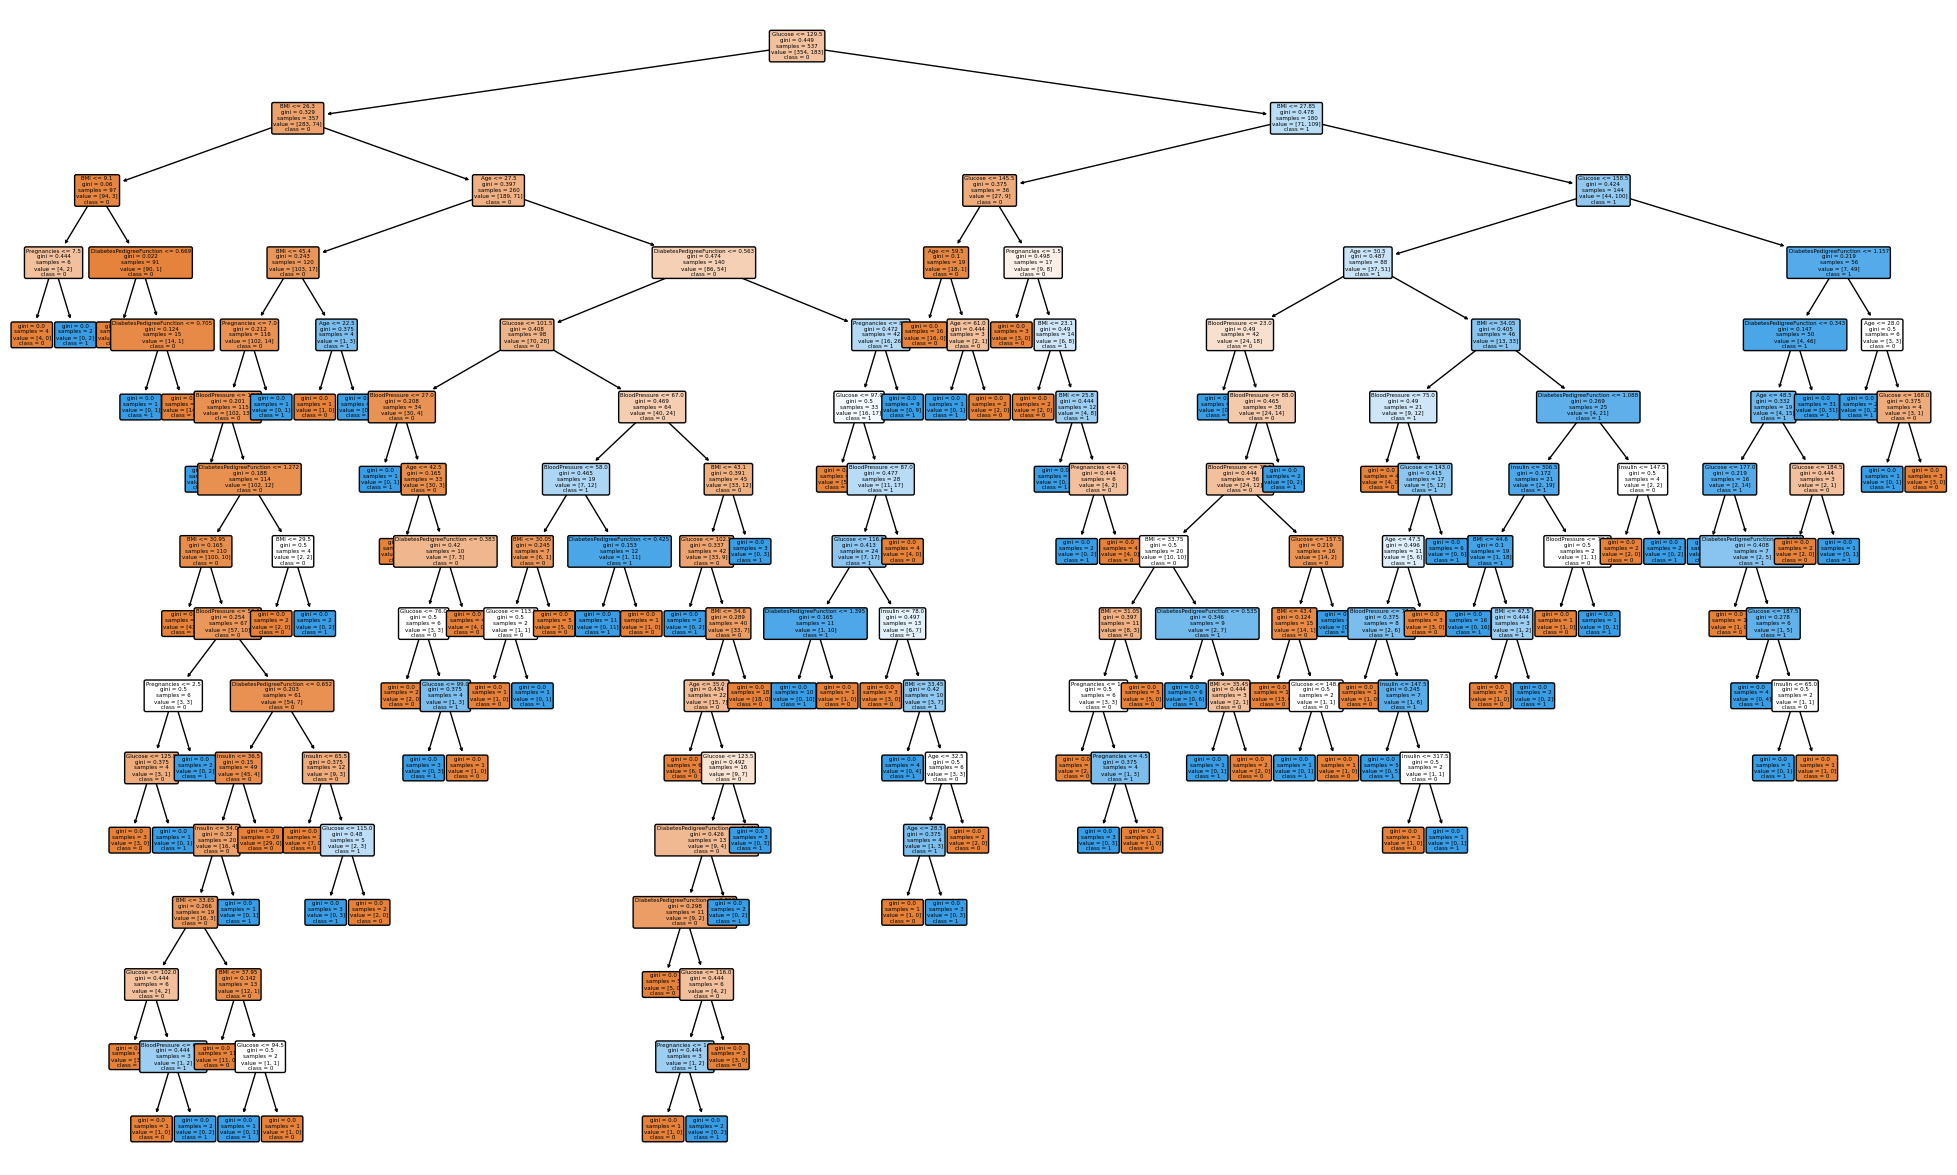

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 15))
plot = plot_tree(dtc, feature_names = cols, class_names = ['0', '1'], filled = True, rounded = True, fontsize=4)
#plt.show()
plt.savefig("decision_tree.png",dpi=300, bbox_inches='tight')